Import the data :

mongoimport --type csv -d energy_data -c policies --headerline --drop State_policies.csv
mongoimport --type csv -d energy_data -c renewables --headerline --drop MER_T10_01.csv
mongoimport --type csv -d energy_data -c biomass --headerline --drop biomass_energy_consump.csv
mongoimport --type csv -d energy_data -c geothermal --headerline --drop geothermal_energy_consump.csv
mongoimport --type csv -d energy_data -c hydropower --headerline --drop hydropower_energy_consump.csv
mongoimport --type csv -d energy_data -c solar --headerline --drop solar_energy_consump2.csv
mongoimport --type csv -d energy_data -c wind --headerline --drop wind_energy_consump.csv

In [75]:
from pymongo import MongoClient
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [76]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [94]:
# confirm that the new database was created
print(mongo.list_database_names())

['admin', 'classDB', 'config', 'energy_data', 'epa', 'fruitsDB', 'fruits_db', 'local', 'met', 'petsitly_marketing', 'uk_food']


In [78]:
# assign the database to a variable name
db = mongo['energy_data']

In [79]:
# review the collections in thedatabase
print(db.list_collection_names())

['solar', 'hydropower', 'biomass', 'policies', 'renewables', 'wind', 'geothermal']


In [88]:
# create a dataframe for each collection
policies_df = pd.DataFrame([p for p in db['policies'].find()])
wind_df = pd.DataFrame([w for w in db['wind'].find()])
renewables_df = pd.DataFrame([r for r in db['renewables'].find()])
biomass_df = pd.DataFrame([r for r in db['biomass'].find()])
geothermal_df = pd.DataFrame([r for r in db['geothermal'].find()])
hydropower_df = pd.DataFrame([r for r in db['hydropower'].find()])
solar_df = pd.DataFrame([r for r in db['solar'].find()])

In [93]:
# check that each df looks okay
solar_df.head()

,_id,State,2000,2001,2002,2003,2004,2005,2006,2007,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,65b9961f0f1722cfb73cc369,AK,0,0,0,0,0,0,0,0,...,3,3,3,3,14,20,28,40,62,112
1,65b9961f0f1722cfb73cc36a,AL,113,97,82,68,54,53,62,63,...,77,98,100,101,431,"1,811","3,423","3,625","3,437","4,608"
2,65b9961f0f1722cfb73cc36b,DE,20,17,15,13,11,11,20,42,...,584,"1,009","1,189","1,229","1,133","1,353","1,491","1,627","1,641","1,773"
3,65b9961f0f1722cfb73cc36c,GA,224,226,231,236,234,237,241,245,...,715,"1,329","2,396","2,460","10,251","20,705","20,944","22,289","36,360","46,685"
4,65b9961f0f1722cfb73cc36d,FL,"27,909","26,770","25,656","24,706","23,957","22,915","22,985","23,160",...,"27,410","28,437","29,755","30,133","30,842","38,184","53,322","68,295","94,430","122,906"


In [114]:
x_axis = np.arange(len(policies_df))
tick_locations = [value for value in x_axis]

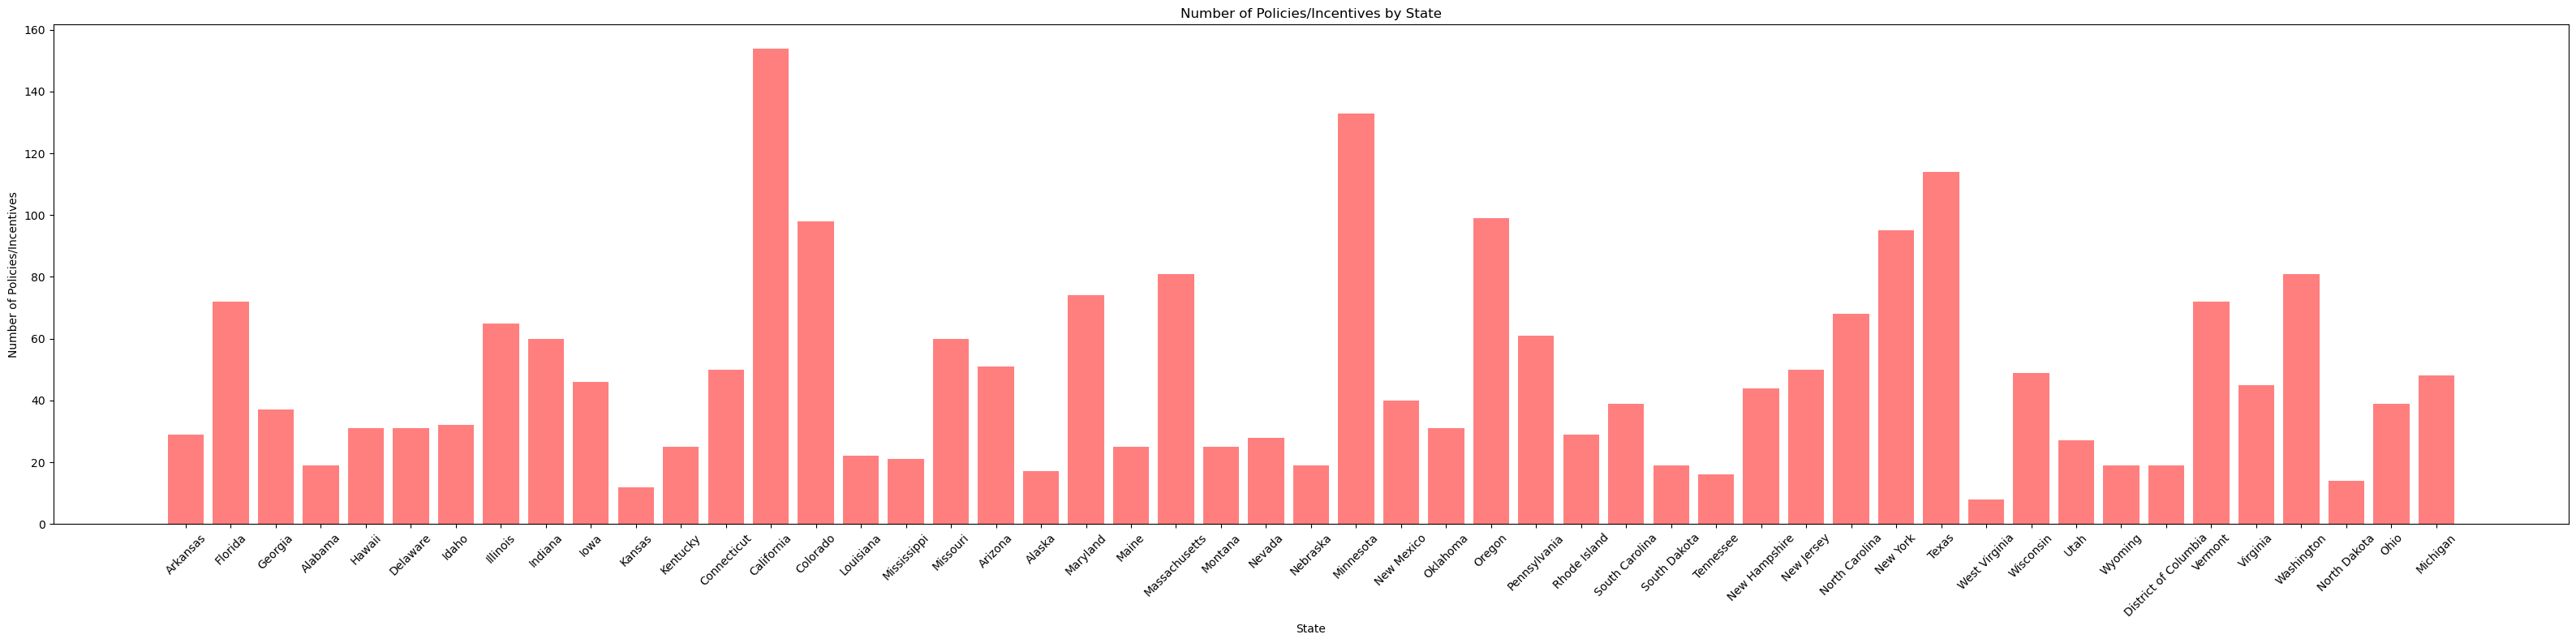

In [137]:
plt.figure(figsize=(40, 8))  
plt.bar(x_axis, policies_df["Number of Policies and Incentives"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, policies_df["State"], rotation=45)
plt.xlabel('State')
plt.ylabel('Number of Policies/Incentives')
plt.title('Number of Policies/Incentives by State')

plt.show()

In [136]:
biomass_df.columns = biomass_df.columns.astype(int)

ValueError: invalid literal for int() with base 10: '_id'

In [132]:
# #transpose energy df's so the states are the columns and years become the rows
# biomass_df = biomass_df.transpose()
# geothermal_df = geothermal_df.transpose()
# hydropower_df = hydropower_df.transpose()
# solar_df = solar_df.transpose()
# wind_df = wind_df.transpose()

In [131]:
# # Select the row corresponding to the year 2021(the most recent year we have data on)
# biomass_2021 = biomass_df.loc['2021']
# geothermal_2021 = geothermal_df.loc['2021']
# hydropower_2021 = hydropower_df.loc['2021']
# solar_2021 = solar_df.loc['2021']
# wind_2021 = wind_df.loc['2021']

In [124]:
# # Define a function to clean and convert values to float
# def clean_and_convert_to_float(df):
#     df = df.replace(',', '', regex=True)  # Remove commas from numbers
#     try:
#         df = df.astype(float)  # Convert values to float
#     except ValueError:
#         df = df.apply(pd.to_numeric, errors='coerce')  # Handle non-numeric values
#     return df

In [127]:
# # Define a function to clean and convert values to float
# def clean_and_convert_to_float(df):
#     # Remove non-numeric characters using regular expressions
#     df = df.replace('[^\d.]', '', regex=True)
#     # Convert to float
#     df = df.astype(float)
#     return df

# # Clean and convert values to float
# biomass_df = clean_and_convert_to_float(biomass_df)
# geothermal_df = clean_and_convert_to_float(geothermal_df)
# hydropower_df = clean_and_convert_to_float(hydropower_df)
# solar_df = clean_and_convert_to_float(solar_df)
# wind_df = clean_and_convert_to_float(wind_df)

ValueError: could not convert string to float: '1,281'

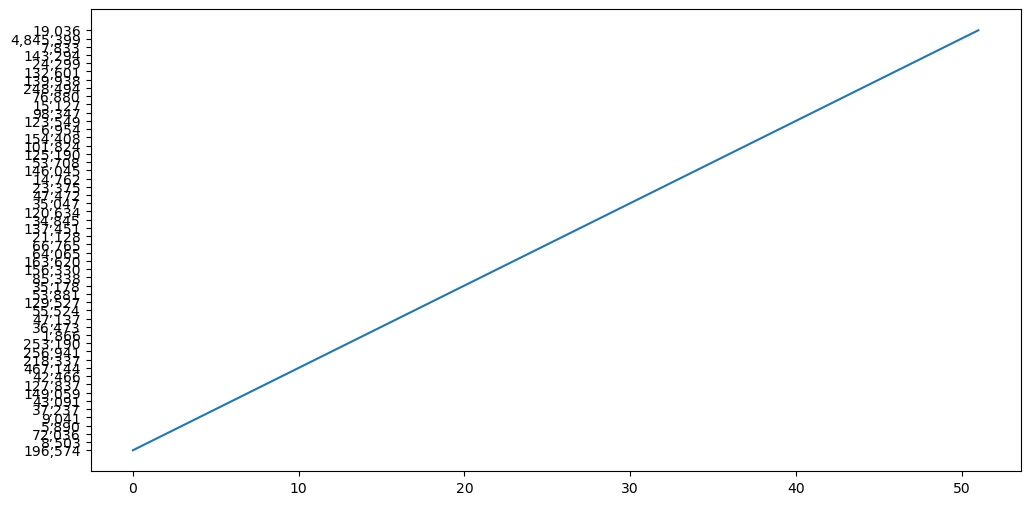

In [133]:
# Plot the renewable energy consumption for each state
plt.figure(figsize=(12, 6))
plt.plot(biomass_2021, label='Biomass')
plt.plot(geothermal_2021, label='Geothermal')
plt.plot(hydropower_2021, label='Hydropower')
plt.plot(solar_2021, label='Solar')
plt.plot(wind_2021, label='Wind')
plt.xlabel('State')
plt.ylabel('Consumption')
plt.title('Renewable Energy Consumption by State in 2021')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()